# **Customer Churn Prediction**
This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv')

In [4]:
df.shape

(10000, 14)

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0




Surname : The surname of the customer

CreditScore : The credit score of the customer

Geography : The country of the customer(Germany/France/Spain)

Gender : The gender of the customer (Female/Male)

Age : The age of the customer

Tenure : The customer's number of years in the in the bank

Balance : The customer's account balance

NumOfProducts : The number of bank products that the customer uses

HasCrCard : Does the customer has a card? (0=No,1=Yes)

IsActiveMember : Does the customer has an active mebership (0=No, 1=Yes)

EstimatedSalary : The estimated salary of the customer

Exited : Churned or not? (0=No,1=Yes)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


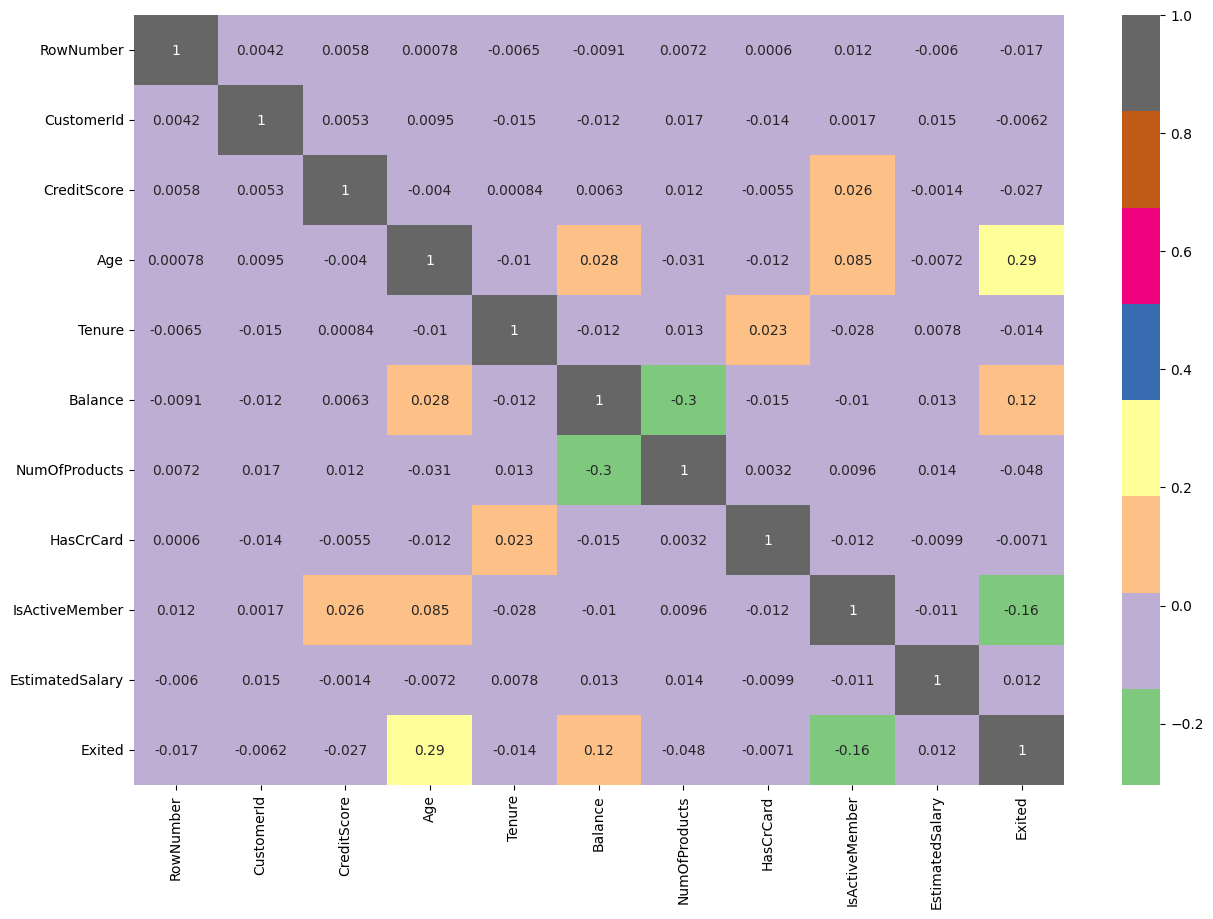

In [16]:
# Calculate the correlation matrix
corr = df.corr(numeric_only=True)

plt.figure(figsize=(15,10))
# Create the heatmap
sns.heatmap(corr, annot=True, cmap='Accent')
plt.show()

In [17]:
features = corr['Exited'].sort_values(ascending=False)
features

,Exited
Exited,1.000000
Age,0.285323
Balance,0.118533
EstimatedSalary,0.012097
CustomerId,-0.006248
HasCrCard,-0.007138
Tenure,-0.014001
RowNumber,-0.016571
CreditScore,-0.027094
NumOfProducts,-0.047820


## **Data Analysis & Visualization**

In [18]:
features.index,features.values

(Index(['Exited', 'Age', 'Balance', 'EstimatedSalary', 'CustomerId',
        'HasCrCard', 'Tenure', 'RowNumber', 'CreditScore', 'NumOfProducts',
        'IsActiveMember'],
       dtype='object'),
 array([ 1.        ,  0.28532304,  0.11853277,  0.01209686, -0.00624799,
        -0.00713777, -0.01400061, -0.01657137, -0.02709354, -0.04781986,
        -0.15612828]))

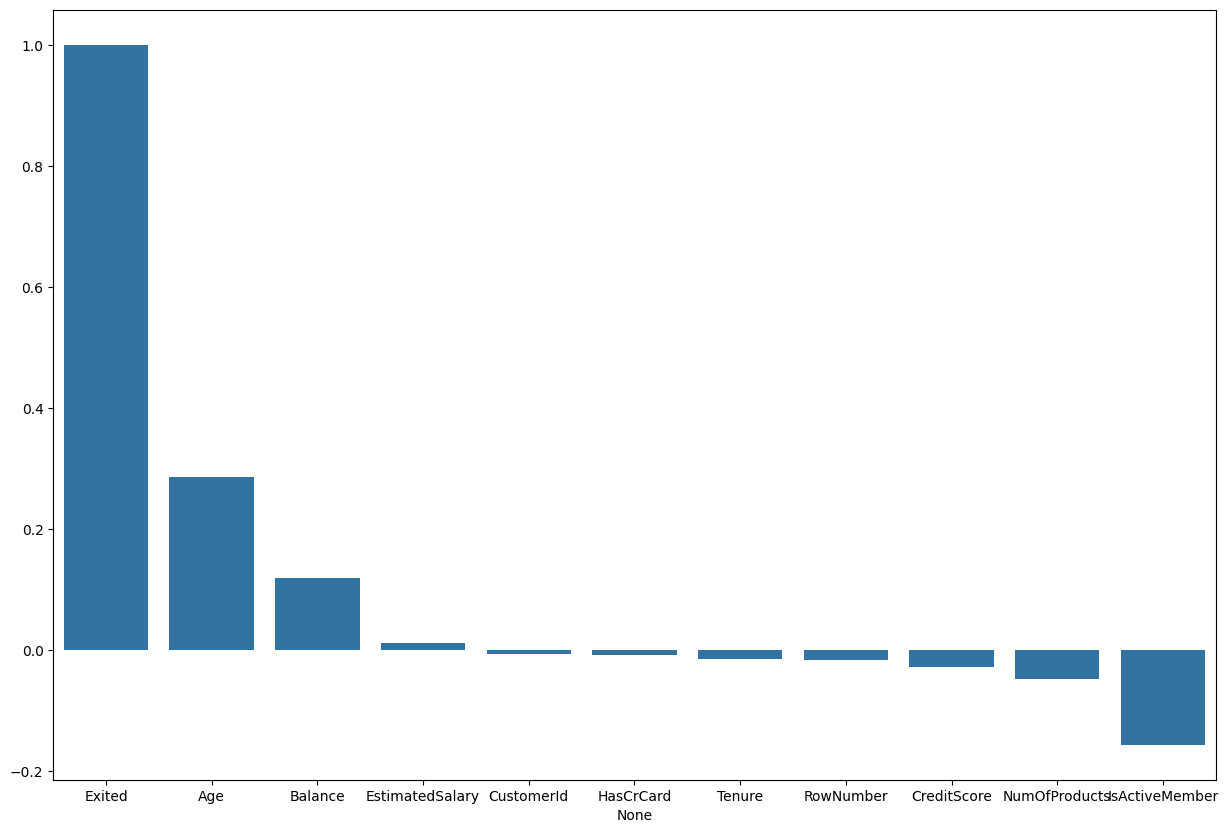

In [23]:
plt.figure(figsize=(15,10))
sns.barplot(x = features.index, y = features.values)
plt.show()

In [24]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


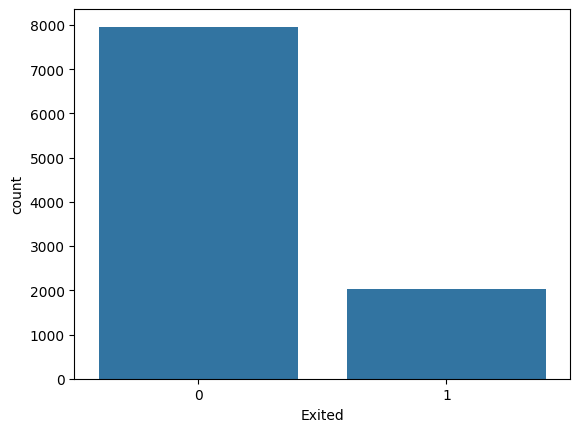

In [25]:
sns.countplot(x='Exited', data = df)
plt.show()

In [28]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


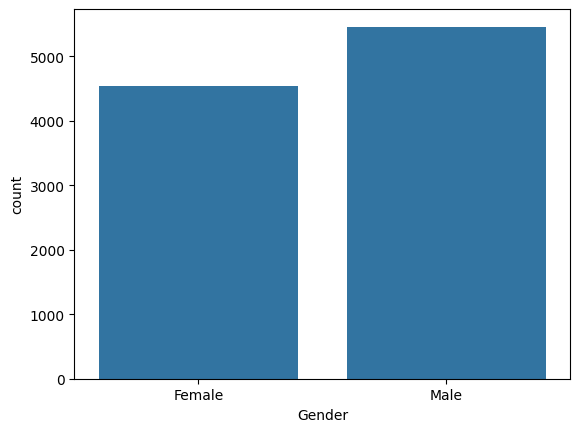

In [29]:
sns.countplot(x='Gender', data = df)
plt.show()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64


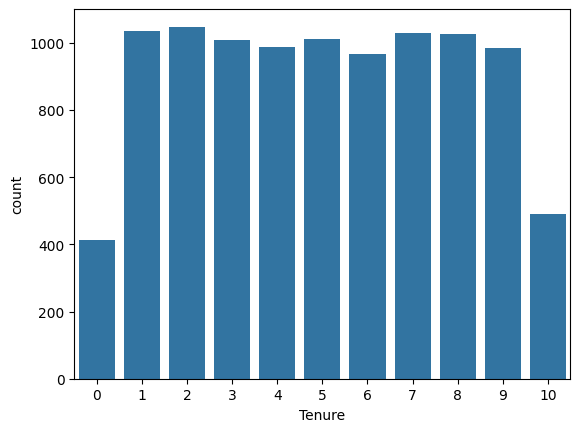

In [30]:
print(df['Tenure'].value_counts())

sns.countplot(x='Tenure', data = df)
plt.show()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


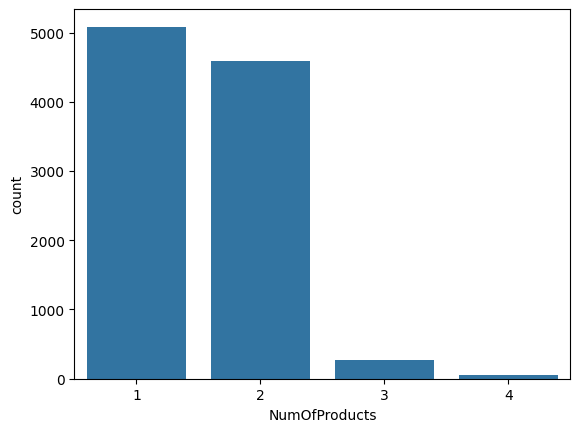

In [31]:
print(df['NumOfProducts'].value_counts())

sns.countplot(x='NumOfProducts', data = df)
plt.show()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64


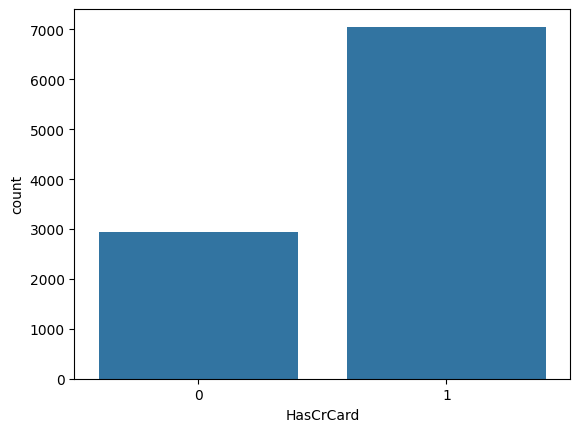

In [32]:
print(df['HasCrCard'].value_counts())

sns.countplot(x='HasCrCard', data = df)
plt.show()

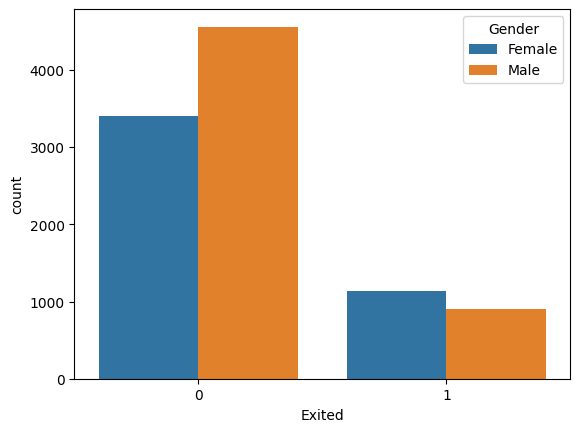

In [33]:
sns.countplot(x='Exited', data = df, hue= 'Gender')
plt.show()

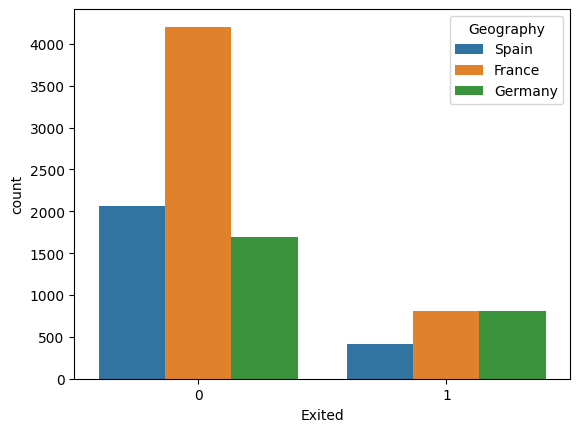

In [34]:
sns.countplot(x='Exited', data = df, hue= 'Geography')
plt.show()

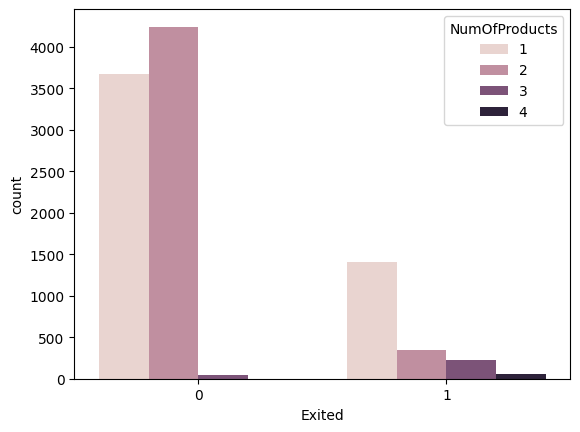

In [35]:
sns.countplot(x='Exited', data = df, hue= 'NumOfProducts')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


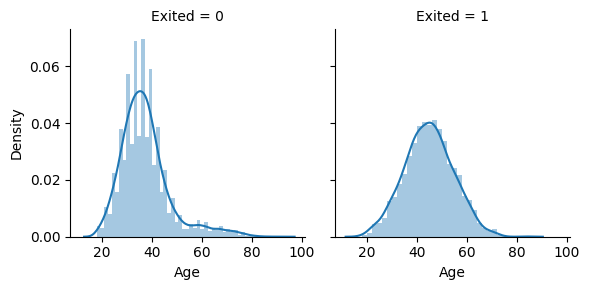

In [36]:
sns.FacetGrid(df, col='Exited')\
    .map(sns.distplot,  "Age")

plt.show()

## **Data Preprocessing**

In [37]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],  axis=1, inplace=True)

In [40]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
df['Geography'] = df['Geography'].astype('category').cat.codes

In [44]:
df['Geography']

,Geography
0,0
1,2
2,0
3,0
4,2
...,...
9995,0
9996,0
9997,0
9998,1


In [45]:
df['Gender'] = np.where(df['Gender']=='Male',1,0)

In [46]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [47]:
X = df.drop(columns=['Exited']).values
y = df['Exited'].values

In [48]:
X.shape,y.shape

((10000, 10), (10000,))

## **Model**

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [53]:
XT,Xt,yT,yt = train_test_split(X,y, test_size=0.33, random_state=42)

In [55]:
XT.shape,yT.shape,Xt.shape,yt.shape

((6700, 10), (6700,), (3300, 10), (3300,))

### **Base Model**

In [51]:
from xgboost import XGBClassifier

In [52]:
model = XGBClassifier()

In [56]:
model.fit(XT,yT)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [57]:
def evalModel(model):
  print('training accuracy : ',model.score(XT,yT))
  print('testing accuracy : ',model.score(Xt,yt))

  y_pred = model.predict(Xt)

  print(confusion_matrix(yt,y_pred))
  print(classification_report(yt,y_pred))
  print(f1_score(yt,y_pred))

In [58]:
evalModel(model)

training accuracy :  0.9619402985074627
testing accuracy :  0.8639393939393939
[[2521  136]
 [ 313  330]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2657
           1       0.71      0.51      0.60       643

    accuracy                           0.86      3300
   macro avg       0.80      0.73      0.76      3300
weighted avg       0.85      0.86      0.86      3300

0.5951307484220018


## **Hyperparameter Tuning**

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
xgb_params = {
    'n_estimators':[100,200],
    'max_depth':[4,5]
}

In [62]:
grid = GridSearchCV(model, xgb_params, cv=10, scoring='accuracy')

In [63]:
grid.fit(XT,yT)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [4, 5], 'n_estimators': [100, 200]},
             scoring='accuracy')

In [64]:
grid.best_score_

0.8497014925373133

In [65]:
grid.best_params_

{'max_depth': 4, 'n_estimators': 100}

### **Model_1 - XGBoosting**

In [66]:
model_1 = XGBClassifier(max_depth=4)

In [67]:
model_1.fit(XT,yT)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [68]:
evalModel(model_1)

training accuracy :  0.905223880597015
testing accuracy :  0.8654545454545455
[[2534  123]
 [ 321  322]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2657
           1       0.72      0.50      0.59       643

    accuracy                           0.87      3300
   macro avg       0.81      0.73      0.76      3300
weighted avg       0.86      0.87      0.86      3300

0.5919117647058824


### **Model_2 - GradientBoosting**


In [69]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
model_2 = GradientBoostingClassifier(n_estimators=500)

In [72]:
model_2.fit(XT,yT)

GradientBoostingClassifier(n_estimators=500)

In [73]:
evalModel(model_2)

training accuracy :  0.9073134328358209
testing accuracy :  0.8696969696969697
[[2547  110]
 [ 320  323]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2657
           1       0.75      0.50      0.60       643

    accuracy                           0.87      3300
   macro avg       0.82      0.73      0.76      3300
weighted avg       0.86      0.87      0.86      3300

0.6003717472118959
